In [94]:
#import packages and set plotting to be inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [95]:
#Load the dataset
df = pd.read_csv('Affordable_Housing_by_Town_2011-2022.csv')

In [96]:
#View the head of the dataset
df.head(10)

,Year,Town Code,Town,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2020,1,Andover,1317,18.0,1,32,0,51,3.87
1,2020,2,Ansonia,8148,349.0,764,147,0,1260,15.46
2,2020,3,Ashford,1903,32.0,0,36,0,68,3.57
3,2020,4,Avon,7389,244.0,16,44,0,304,4.11
4,2020,5,Barkhamsted,1589,0.0,6,23,0,29,1.83
5,2020,6,Beacon Falls,2509,0.0,4,46,0,50,1.99
6,2020,7,Berlin,8140,556.0,50,142,4,752,9.24
7,2020,8,Bethany,2044,0.0,2,13,0,15,0.73
8,2020,9,Bethel,7310,192.0,26,154,87,459,6.28
9,2020,10,Bethlehem,1575,24.0,0,9,0,33,2.10


In [97]:
df.shape

(2025, 10)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2025 non-null   int64  
 1   Town Code                            2025 non-null   int64  
 2   Town                                 2025 non-null   object 
 3   2010 Census Units                    2025 non-null   int64  
 4   Government Assisted                  2024 non-null   float64
 5   Tenant Rental Assistance             2025 non-null   int64  
 6    Single Family CHFA/ USDA Mortgages  2025 non-null   int64  
 7   Deed Restricted Units                2025 non-null   int64  
 8   Total Assisted Units                 2025 non-null   int64  
 9   Percent Affordable                   2025 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 158.3+ KB


In [99]:
df.rename(columns = {'Year': 'year','Town Code': 'town_code', 'Town': 'town', 
                     '2010 Census Units': '2010_census_unit', 'Government Assisted': 'government_assisted', 
                     'Tenant Rental Assistance': 'rental_assistance', ' Single Family CHFA/ USDA Mortgages': 'morgages',
                     'Deed Restricted Units': 'restricted', 'Total Assisted Units': 'total_assisted', 
                     'Percent Affordable': 'percent'}, inplace = True)

In [100]:
df['government_assisted'].sum()

1088055.0

In [101]:
df['government_assisted'] = df['government_assisted'].astype('Int64')

In [102]:
df[df['government_assisted'].isnull()]

,year,town_code,town,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
530,2017,24,Chaplin,988,<NA>,0,35,0,35,3.54


In [104]:
df.loc[df[df.government_assisted.isnull()].index[0], 'government_assisted'] = df['government_assisted'].mean().round()

In [47]:
df.describe()

,year,town_code,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
count,2025.000000,2025.000000,2025.000000,2024.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,2016.502222,84.921481,8802.104691,537.576581,263.554568,165.792593,32.701235,999.359506,6.196923
std,3.454979,48.838316,10447.314222,1339.781673,933.519526,284.399177,124.038899,2522.972459,6.159299
min,2011.000000,1.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,43.000000,2306.000000,24.000000,2.000000,18.000000,0.000000,51.000000,2.170000
50%,2017.000000,85.000000,5451.000000,137.000000,7.000000,51.000000,0.000000,220.000000,4.230000
75%,2020.000000,127.000000,10061.000000,377.000000,88.000000,186.000000,17.000000,684.000000,7.730000
max,2022.000000,169.000000,57012.000000,10733.000000,9132.000000,2429.000000,1295.000000,21122.000000,40.760000


In [48]:
df[df['government_assisted'] == 10733]

,year,town_code,town,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
1750,2021,64,Hartford,51822,10733,8723,1441,0,20897,40.32


In [29]:
df[df['restricted'] == 1295]

,year,town_code,town,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
1145,2014,135,Stamford,50573,4862,1732,326,1295,8215,16.24
1314,2013,135,Stamford,50573,4863,1631,326,1295,8115,16.05
1483,2012,135,Stamford,50573,4618,1605,309,1295,7827,15.48


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 2025 non-null   int64  
 1   town_code            2025 non-null   int64  
 2   town                 2025 non-null   object 
 3   2010_census_unit     2025 non-null   int64  
 4   government_assisted  2025 non-null   Int64  
 5   rental_assistance    2025 non-null   int64  
 6   morgages             2025 non-null   int64  
 7   restricted           2025 non-null   int64  
 8   total_assisted       2025 non-null   int64  
 9   percent              2025 non-null   float64
dtypes: Int64(1), float64(1), int64(7), object(1)
memory usage: 160.3+ KB


In [116]:
group_df = df.groupby('year').mean()
group_df

,town_code,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
year,,,,,,,,
2011,85.000000,8804.088757,510.112426,246.230769,155.130178,32.431953,943.905325,5.712663
2012,85.000000,8804.088757,510.112426,252.360947,158.751479,33.680473,954.905325,5.818757
2013,85.000000,8804.088757,517.633136,263.337278,175.455621,34.721893,991.147929,6.225680
2014,85.000000,8804.088757,539.946746,246.372781,176.769231,34.869822,997.958580,6.400355
2015,84.042169,8779.885542,558.566265,249.921687,186.078313,33.048193,1027.614458,6.422470
2016,85.000000,8804.088757,536.609467,252.414201,153.881657,33.414201,976.319527,6.081361
2017,85.000000,8804.088757,542.952663,262.727811,161.621302,33.372781,997.491124,6.216982
2018,85.000000,8804.088757,537.242604,261.071006,164.337278,30.905325,993.556213,6.151479
2019,85.000000,8804.088757,540.254438,273.899408,174.668639,30.568047,1019.390533,6.314675


In [115]:
group_df.describe()

,town_code,2010_census_unit,government_assisted,rental_assistance,morgages,restricted,total_assisted,percent
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,84.920181,8802.071823,537.607840,263.534401,165.822601,32.701748,999.401303,6.197257
std,0.276502,6.986866,16.957176,15.277066,11.850946,1.418100,29.762327,0.229948
min,84.042169,8779.885542,510.112426,246.230769,146.804734,30.568047,943.905325,5.712663
25%,85.000000,8804.088757,531.865385,251.751132,157.846154,31.744083,987.440828,6.133950
50%,85.000000,8804.088757,540.100592,261.899408,162.979290,32.740073,997.724852,6.231893
75%,85.000000,8804.088757,547.433432,275.001479,175.760355,33.480769,1027.743388,6.363698
max,85.000000,8804.088757,558.566265,291.142012,186.078313,34.869822,1031.579882,6.433077


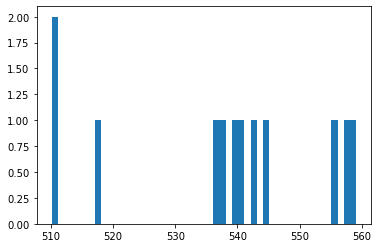

In [124]:
bin = np.arange(group_df.government_assisted.min(), group_df.government_assisted.max()+1, 1)
plt.hist(group_df.government_assisted, bins = bin);